In [14]:
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('fake_job_postings.csv')

(17880, 18)
   job_id             title          location department salary_range  \
0       1  Marketing Intern  US, NY, New York  Marketing          NaN   

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   

                                        requirements benefits  telecommuting  \
0  Experience with content management systems a m...      NaN              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   

  required_education industry   function  fraudulent  
0                NaN      NaN  Marketing           0  
job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description    

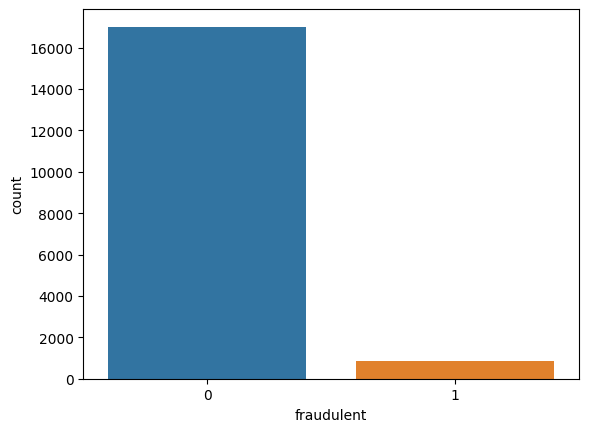

In [9]:
# Check the shape of the dataset
print(df.shape)

# Check the top few rows of the dataset
print(df.head(1))

# Check the data types of each column
print(df.dtypes)

# Check for missing values
print(df.isna().sum())

# Check the distribution of the target variable
sns.countplot(x='fraudulent', data=df)
plt.show()

In [10]:
# Convert categorical variables to numerical variables
X = df.drop('fraudulent', axis=1)
y = df['fraudulent']

le = LabelEncoder()
oe = OneHotEncoder()

X['employment_type'] = le.fit_transform(X['employment_type'].astype(str))
X['required_experience'] = le.fit_transform(X['required_experience'].astype(str))
X['required_education'] = le.fit_transform(X['required_education'].astype(str))

X = oe.fit_transform(X).toarray()

# Scaling the independent variables
sc = StandardScaler()
X = sc.fit_transform(X)

# Split the dataset into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [11]:
# Define the model architecture
model = Sequential([
    Dense(64, input_dim=X_train.shape[1]),
    Activation('relu'),
    Dropout(0.5),
    Dense(32),
    Activation('relu'),
    Dropout(0.5),
    Dense(1),
    Activation('sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1)


Epoch 1/50
358/358 [==============================] - 7s 17ms/step - loss: 0.6532 - accuracy: 0.8778 - val_loss: 0.2217 - val_accuracy: 0.9514
Epoch 2/50
358/358 [==============================] - 5s 15ms/step - loss: 0.2671 - accuracy: 0.9384 - val_loss: 0.1936 - val_accuracy: 0.9605
Epoch 3/50
358/358 [==============================] - 5s 15ms/step - loss: 0.1690 - accuracy: 0.9547 - val_loss: 0.2072 - val_accuracy: 0.9549
Epoch 4/50
358/358 [==============================] - 5s 15ms/step - loss: 0.1060 - accuracy: 0.9685 - val_loss: 0.2167 - val_accuracy: 0.9388
Epoch 5/50
358/358 [==============================] - 5s 15ms/step - loss: 0.0765 - accuracy: 0.9762 - val_loss: 0.2300 - val_accuracy: 0.9137
Epoch 6/50
358/358 [==============================] - 5s 13ms/step - loss: 0.0527 - accuracy: 0.9850 - val_loss: 0.2590 - val_accuracy: 0.8836
Epoch 7/50
358/358 [==============================] - 5s 13ms/step - loss: 0.0373 - accuracy: 0.9870 - val_loss: 0.3148 - val_accuracy: 0.8483

In [12]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=64)
print("Test accuracy:", accuracy)

56/56 [==============================] - 1s 17ms/step - loss: 0.8529 - accuracy: 0.9636
Test accuracy: 0.9636465311050415


#### Confusionmatrix

112/112 [==============================] - 1s 5ms/step


<Figure size 800x800 with 0 Axes>

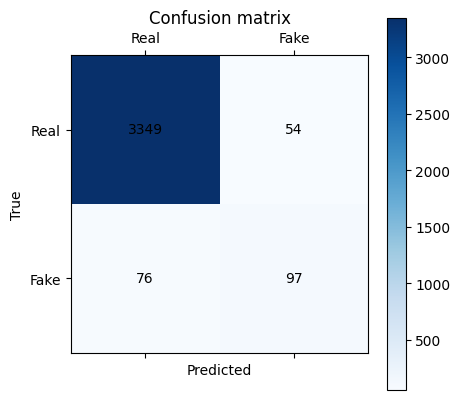

In [15]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a plot of the confusion matrix
labels = ['Real', 'Fake']
fig = plt.figure(figsize=(8,8))
plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion matrix')
plt.xticks([0,1], labels)
plt.yticks([0,1], labels)
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='black')
plt.show();